<a href="https://colab.research.google.com/github/Mvgrillo1357/Ai-Platform-Engineering/blob/master/ml_applied_to_coronavirus/Coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/kimjihoo/coronavirusdataset#case.csv the dataset source

In [1]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install kaggle


In [0]:
!mkdir .kaggle
!mkdir ~/.kaggle

In [0]:
import json
token = {"username":"michaelgrillo","key":"1b1b61b21b7bd669c2b170bf718b9cd8"}
with open ('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [6]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [7]:
!kaggle datasets download -d kimjihoo/coronavirusdataset -p /content --force

  0% 0.00/2.53M [00:00<?, ?B/s]
100% 2.53M/2.53M [00:00<00:00, 82.8MB/s]


In [8]:
!unzip \*.zip

Archive:  coronavirusdataset.zip
  inflating: Case.csv                
  inflating: PatientInfo.csv         
  inflating: PatientRoute.csv        
  inflating: Region.csv              
  inflating: SearchTrend.csv         
  inflating: SeoulFloating.csv       
  inflating: Time.csv                
  inflating: TimeAge.csv             
  inflating: TimeGender.csv          
  inflating: TimeProvince.csv        
  inflating: Weather.csv             


In [9]:
!ls

Case.csv		Region.csv	   TimeAge.csv	     Weather.csv
coronavirusdataset.zip	sample_data	   Time.csv
PatientInfo.csv		SearchTrend.csv    TimeGender.csv
PatientRoute.csv	SeoulFloating.csv  TimeProvince.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import scipy as sp
!pip install geopandas
import sklearn as skl
import geopandas as gpd
import geopy
import folium
from shapely.geometry import Point, Polygon
from sklearn.cluster import KMeans
from shapely.ops import nearest_points
from geopy.geocoders import Nominatim
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, mean_squared_error
from collections import Counter
from sklearn.datasets import make_classification
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pickle as plk
import math
import matplotlib as mpl

     |████████████████████████████████| 931kB 3.4MB/s 
     |████████████████████████████████| 14.7MB 201kB/s 
     |████████████████████████████████| 10.4MB 24.0MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
import io
df_case = pd.read_csv('Case.csv')
df_patientroute = pd.read_csv('PatientRoute.csv')
df_region = pd.read_csv('Region.csv')
df_patientinfo = pd.read_csv('PatientInfo.csv')
df_searchtrend=pd.read_csv('SearchTrend.csv')
df_timeage=pd.read_csv('TimeAge.csv')
df_time=pd.read_csv('Time.csv')
df_timegender=pd.read_csv('TimeGender.csv')
df_timeprovince=pd.read_csv('TimeProvince.csv')
df_weather=pd.read_csv('Weather.csv')

In [12]:
df_case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


It looks like the null values are described as "-" these values need to be handled.

In [13]:
badpoints=df_case.loc[df_case['latitude']== '-']
badpoints

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
6,1000007,Seoul,from other city,True,Shincheonji Church,6,-,-
7,1000008,Seoul,-,False,etc,65,-,-
9,1100002,Busan,from other city,True,Shincheonji Church,8,-,-
13,1100006,Busan,from other city,True,Cheongdo Daenam Hospital,1,-,-
14,1100007,Busan,-,False,etc,32,-,-
16,1200002,Daegu,-,False,contact with patient,649,-,-
17,1200003,Daegu,from other city,True,Cheongdo Daenam Hospital,2,-,-
18,1200004,Daegu,-,False,etc,1056,-,-
19,1300001,Gwangju,from other city,True,Shincheonji Church,9,-,-
20,1300002,Gwangju,-,False,contact with patient,4,-,-


Fascinating, According to https://www.nytimes.com/2020/03/10/world/asia/south-korea-coronavirus-shincheonji.html and https://www.christianitytoday.com/news/2020/february/korea-coronavirus-shincheonji-church-daegu-covid19.html , Shincheonji Church is a haven for the virus. That may make it difficult to handle this data especially since the dataset states they are from other cities so this will have to be dropped. The Pilgrimage to Israel is impossible to tell where in the pilgrimmage the infection originated from. According to https://www.christianitytoday.com/news/2020/february/korea-coronavirus-churches-close-sunday-shincheonji-covid19.html Onchun Church is “investigating the possibility of Shincheonji’s infiltrating into our church” so that could mean that the virus was spread from Shincheonji Church!?!

Additionally there are points that are represented as "etc." and "overseas inflow" which are impossible to impute.

This data table is not great for my needs but dropping the null "-" values may allow me to conduct reasonable geospatial analysis.


In [14]:
df_casef = df_case[df_case.latitude != '-']
df_casef

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
5,1000006,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377
8,1100001,Busan,Dongnae-gu,True,Onchun Church,34,35.21628,129.0771
10,1100003,Busan,Suyeong-gu,True,Suyeong-gu Kindergarten,6,35.16708,129.1124
11,1100004,Busan,Haeundae-gu,True,Haeundae-gu Catholic Church,6,35.20599,129.1256
12,1100005,Busan,Jin-gu,True,Jin-gu Academy,4,35.17371,129.0633


now that we have the non null values we can conduct further analysis

In [15]:
df_casef.city.unique()

array(['Guro-gu', 'Dongdaemun-gu', 'Eunpyeong-gu', 'Seongdong-gu',
       'Jongno-gu', 'Jung-gu', 'Dongnae-gu', 'Suyeong-gu', 'Haeundae-gu',
       'Jin-gu', 'Nam-gu', 'Eojin-dong', 'Boram-dong', 'Seongnam-si',
       'Suwon-si', 'Goesan-gun', 'Cheonan-si', 'Seosan-si',
       'Cheongdo-gun', 'Bonghwa-gun', 'Chilgok-gun', 'Gyeongsan-si',
       'Geochang-gun', 'Changwon-si', 'Changnyeong-gun'], dtype=object)

In order to easily map the data I created a geodataframe.

It turns out WGS84 stands for World Geodetic System 1984 and the crs for this is actually EPSG:3395.

In [16]:
def create_gdf(df_casef, lng, lat):
    "Convert pandas dataframe into a Geopandas GeoDataFrame"
    crs = {'init': 'EPSG:3395'}
    xlng= pd.to_numeric(df_casef['longitude'], errors='coerce')
    ylat= pd.to_numeric(df_casef['latitude'], errors='coerce')
    geometry = [Point(xy) for xy in zip(xlng, ylat)]
    gdf2 = gpd.GeoDataFrame(df_casef, crs= crs , geometry=geometry)
    return gdf2
gdf_casef =  create_gdf(df_casef, "longitude", "latitude")
gdf_casef.tail()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,case_id,province,city,group,infection_case,confirmed,latitude,longitude,geometry
71,6000008,Gyeongsangbuk-do,Gyeongsan-si,True,Gyeongsan Cham Joeun Community Center,16,35.82558,128.7373,POINT (128.73730 35.82558)
74,6100002,Gyeongsangnam-do,Geochang-gun,True,Geochang Church,10,35.68556,127.9127,POINT (127.91270 35.68556)
75,6100003,Gyeongsangnam-do,Geochang-gun,True,Geochang-gun Woongyang-myeon,8,35.805681,127.917805,POINT (127.91781 35.80568)
76,6100004,Gyeongsangnam-do,Changwon-si,True,Hanmaeum Changwon Hospital,7,35.22115,128.6866,POINT (128.68660 35.22115)
77,6100005,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008,POINT (128.50080 35.54127)


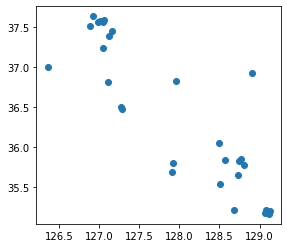

In [17]:
gdf_casef.plot()

Let's see if we can find the minimum haversine distance to optimize medical resource placement/ find centroids of the clusters of greatest problems to find the features of those centroids.

In [18]:
df_patientroute.tail()

,patient_id,global_num,date,province,city,latitude,longitude
170,1200000031,31,2020-02-09,Daegu,Nam-gu,35.83982,128.5666
171,1200000031,31,2020-02-15,Daegu,Dong-gu,35.88241,128.6621
172,1200000031,31,2020-02-16,Daegu,Nam-gu,35.83982,128.5666
173,1200000031,31,2020-02-17,Daegu,Suseong-gu,35.84473,128.6123
174,1200000031,31,2020-02-18,Daegu,Seo-gu,35.85959,128.5406


In [19]:
badroutes=df_patientroute.loc[df_patientroute['latitude']== '-']
badroutes

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,patient_id,global_num,date,province,city,latitude,longitude


Good this data is complete. We can use this 

In [20]:
df_patientroute.isnull().sum()

patient_id    0
global_num    0
date          0
province      0
city          0
latitude      0
longitude     0
dtype: int64

In [21]:
def create_gdf2(df_patientroute, lng, lat):
    "Convert pandas dataframe into a Geopandas GeoDataFrame"
    crs = {'init': 'EPSG:3395'}
    xlng= pd.to_numeric(df_patientroute['longitude'], errors='coerce')
    ylat= pd.to_numeric(df_patientroute['latitude'], errors='coerce')
    geometry = [Point(xy) for xy in zip(xlng, ylat)]
    gdf3 = gpd.GeoDataFrame(df_patientroute, crs= crs , geometry=geometry)
    return gdf3
gdf_patientroutef =  create_gdf2(df_patientroute, "longitude", "latitude")
gdf_patientroutef.tail()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,patient_id,global_num,date,province,city,latitude,longitude,geometry
170,1200000031,31,2020-02-09,Daegu,Nam-gu,35.83982,128.5666,POINT (128.56660 35.83982)
171,1200000031,31,2020-02-15,Daegu,Dong-gu,35.88241,128.6621,POINT (128.66210 35.88241)
172,1200000031,31,2020-02-16,Daegu,Nam-gu,35.83982,128.5666,POINT (128.56660 35.83982)
173,1200000031,31,2020-02-17,Daegu,Suseong-gu,35.84473,128.6123,POINT (128.61230 35.84473)
174,1200000031,31,2020-02-18,Daegu,Seo-gu,35.85959,128.5406,POINT (128.54060 35.85959)


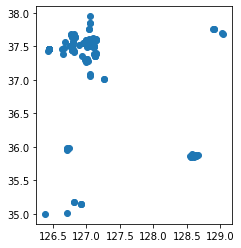

In [22]:
gdf_patientroutef.plot()

In [23]:
df_region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [24]:
df_region.isnull().sum()

code                        0
province                    0
city                        0
latitude                    0
longitude                   0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

This data may need to be included joined with case data so that we can understand commonalities between areas with cases of coronavirus and areas without cases of coronavirus. 

In [25]:
df_region['city'].count()

244

In [26]:
df_region.dtypes

code                          int64
province                     object
city                         object
latitude                    float64
longitude                   float64
elementary_school_count       int64
kindergarten_count            int64
university_count              int64
academy_ratio               float64
elderly_population_ratio    float64
elderly_alone_ratio         float64
nursing_home_count            int64
dtype: object

In [27]:
df_patientinfo.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [28]:
df_patientinfo.shape

(2243, 18)

In [29]:
df_patientinfo.isnull().sum()

patient_id               0
global_num             906
sex                     96
birth_year             454
age                    258
country                  0
province                 0
city                    67
disease               2224
infection_case        1050
infection_order       2201
infected_by           1768
contact_number        1830
symptom_onset_date    2049
confirmed_date         145
released_date         2010
deceased_date         2213
state                   96
dtype: int64

In [30]:
df_patientinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 18 columns):
patient_id            2243 non-null int64
global_num            1337 non-null float64
sex                   2147 non-null object
birth_year            1789 non-null float64
age                   1985 non-null object
country               2243 non-null object
province              2243 non-null object
city                  2176 non-null object
disease               19 non-null object
infection_case        1193 non-null object
infection_order       42 non-null float64
infected_by           475 non-null float64
contact_number        413 non-null float64
symptom_onset_date    194 non-null object
confirmed_date        2098 non-null object
released_date         233 non-null object
deceased_date         30 non-null object
state                 2147 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 315.5+ KB


In [31]:
df_patientinfo['state'].nunique()

3

In [0]:
statuscount=df_patientinfo.state.unique()

count_status=[]
for i in df_patientinfo.state.unique():
    count_status.append(df_patientinfo[df_patientinfo['state']==i].count()['patient_id'])

In [33]:
statuscount

array(['released', 'isolated', 'deceased', nan], dtype=object)

In [34]:
count_status

[314, 1801, 32, 0]

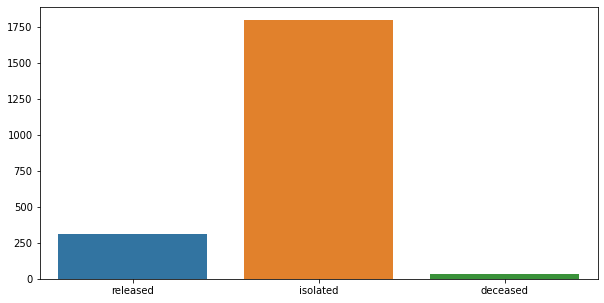

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(statuscount, count_status)

In [36]:
percentdead=32/2117
percentdead

0.015115729806329713

In [37]:
df_patientinfo.disease.unique()

array([nan, True], dtype=object)

In [38]:
df_patientinfo.infection_case.unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', 'Onchun Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten', nan,
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Pilgrimage to Israel'], dtype=object)

In [0]:
howinfected=df_patientinfo.infection_case.unique()

count_infection=[]
for i in df_patientinfo.infection_case.unique():
    count_infection.append(df_patientinfo[df_patientinfo['infection_case']==i].count()['patient_id'])

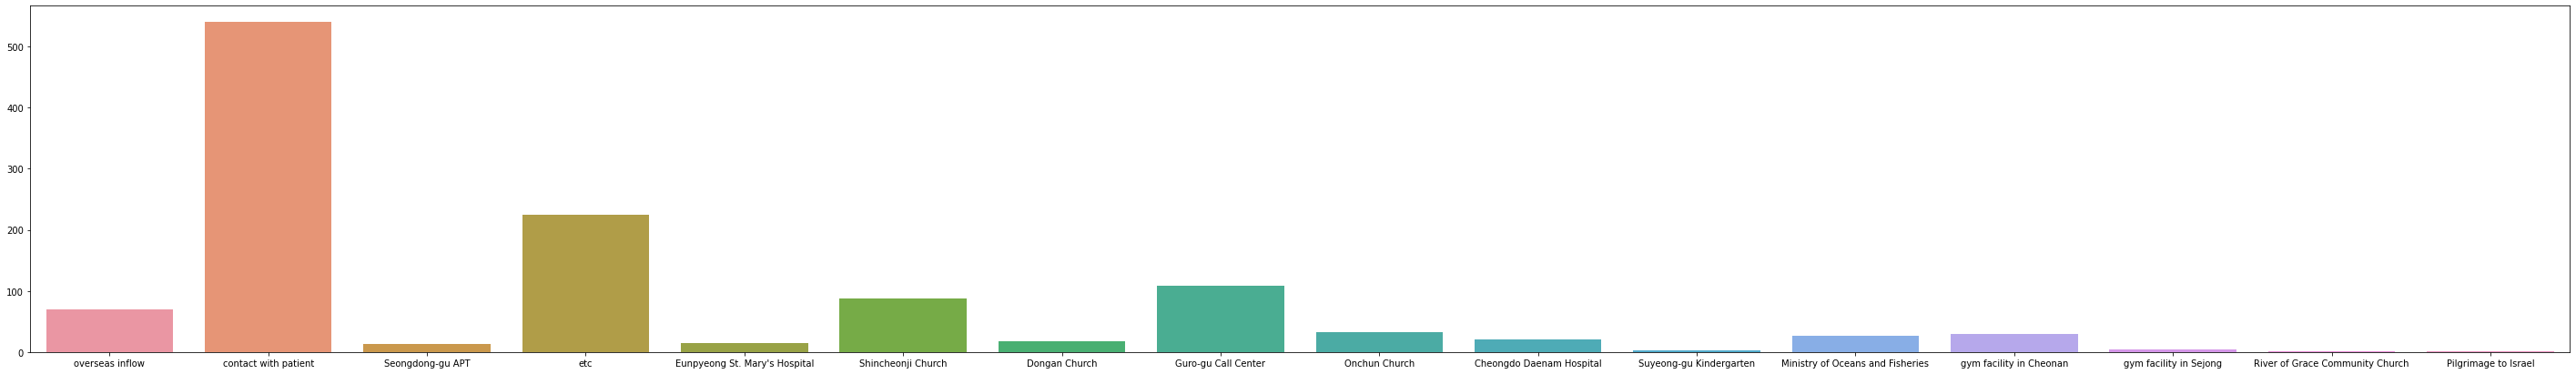

In [40]:
plt.figure(figsize=(50,7))
sns.barplot(howinfected, count_infection)

In [41]:
df_patientinfo.contact_number.unique()

array([7.500e+01, 3.100e+01, 1.700e+01, 9.000e+00, 2.000e+00, 4.300e+01,
       0.000e+00, 6.800e+01, 6.000e+00, 2.300e+01, 1.170e+02, 2.700e+01,
       8.000e+00,       nan, 1.091e+03, 1.310e+02, 1.600e+01, 1.400e+01,
       4.850e+02, 4.000e+00, 1.900e+01, 2.960e+02, 1.500e+01, 3.400e+01,
       1.000e+00, 3.700e+01, 2.200e+01, 7.000e+00, 1.000e+01, 2.800e+01,
       2.100e+01, 3.000e+00, 5.000e+00, 2.500e+01, 1.800e+01, 1.590e+02,
       1.100e+01, 3.000e+01, 4.100e+01, 7.100e+01, 3.800e+01, 1.300e+01,
       1.160e+03, 4.500e+02, 6.500e+01, 1.560e+02, 3.900e+01, 4.700e+01,
       8.600e+01, 7.400e+01, 1.200e+01, 4.600e+01, 6.400e+01, 6.600e+01,
       4.000e+01, 4.900e+01, 2.000e+01, 9.500e+01, 4.220e+02, 2.900e+02,
       5.300e+01, 4.500e+01, 2.400e+01, 3.500e+01, 5.100e+01, 1.300e+02,
       1.060e+02, 1.740e+02, 7.800e+01, 3.300e+01, 1.130e+02, 8.700e+01,
       8.400e+01])

In [0]:
numbercontacted=df_patientinfo.contact_number.unique()

count_seen=[]
for i in df_patientinfo.contact_number.unique():
    count_seen.append(df_patientinfo[df_patientinfo['contact_number']==i].count()['patient_id'])

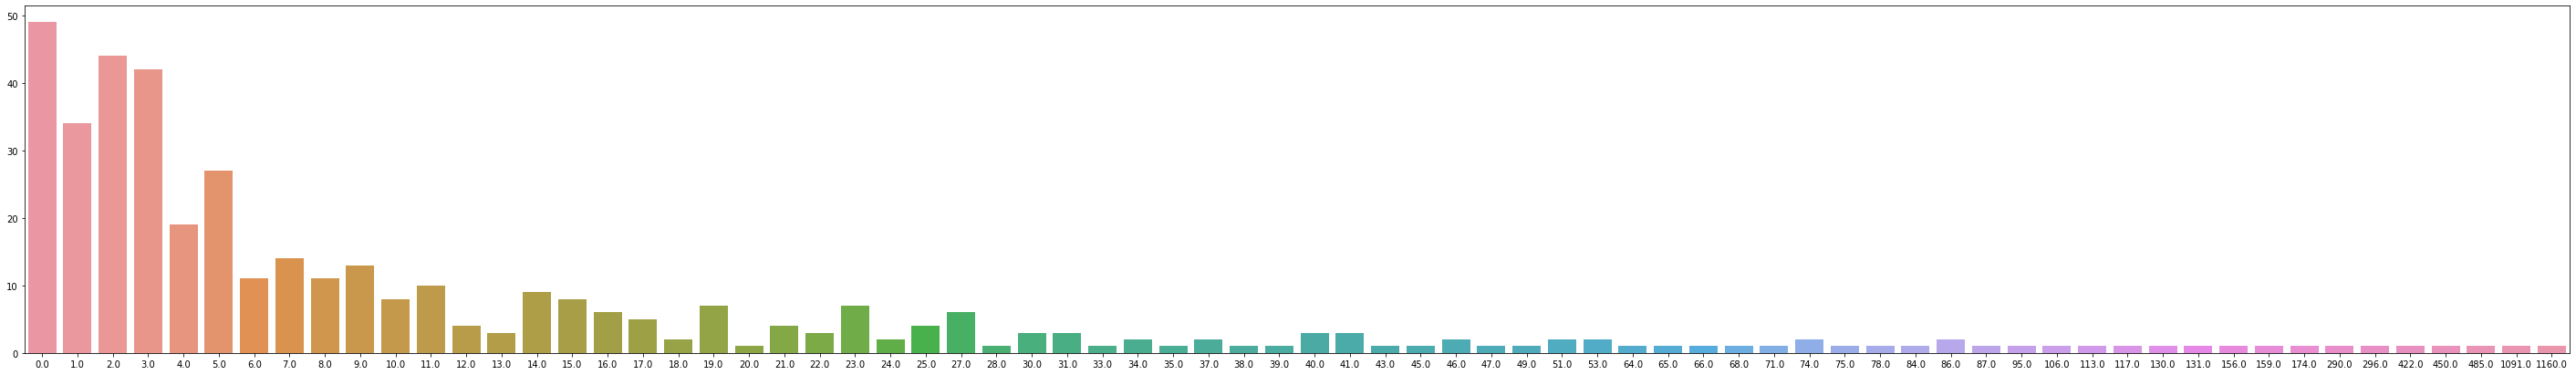

In [43]:
plt.figure(figsize=(50,7))
sns.barplot(numbercontacted, count_seen)

In [44]:
df_searchtrend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-03-17,0.15554,0.34471,0.18181,0.01236
1,2016-03-18,0.14417,0.49416,0.17563,0.01027
2,2016-03-19,0.13290,0.39907,0.15145,0.01154
3,2016-03-20,0.13863,0.39662,0.14408,0.00945
4,2016-03-21,0.16735,0.56989,0.21199,0.00963


In [45]:
df_searchtrend.isnull().sum()

date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64

In [46]:
df_timeage.head(20)

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
5,2020-03-02,0,50s,834,5
6,2020-03-02,0,60s,530,6
7,2020-03-02,0,70s,192,6
8,2020-03-02,0,80s,81,3
9,2020-03-03,0,0s,34,0


In [47]:
df_time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [48]:
df_time.isnull().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

In [49]:
df_timegender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [50]:
df_timegender.isnull().sum()

date         0
time         0
sex          0
confirmed    0
deceased     0
dtype: int64

In [51]:
df_timeprovince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [52]:
df_timeprovince.isnull().sum()

date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

In [53]:
df_timeprovince['province'].count()

1054

In [54]:
df_weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-03-17,9.3,2.0,14.7,0.0,3.2,70.0,40.9
1,10000,Seoul,2016-03-18,13.4,8.8,20.1,0.0,5.0,110.0,50.0
2,10000,Seoul,2016-03-19,11.4,6.6,18.1,0.0,4.8,320.0,58.3
3,10000,Seoul,2016-03-20,10.6,4.9,17.5,0.0,4.6,320.0,54.0
4,10000,Seoul,2016-03-21,9.9,5.5,16.1,0.0,5.4,320.0,54.1


In [55]:
df_weather.isnull().sum()

code                      0
province                  0
date                      0
avg_temp                 15
min_temp                  5
max_temp                  3
precipitation             0
max_wind_speed            9
most_wind_direction      29
avg_relative_humidity    20
dtype: int64

In [56]:
df_patientinfo.shape

(2243, 18)

In [57]:
df_patientroute.shape

(175, 8)

In [58]:
df_casef.shape

(29, 9)

Let's focus on optimizing placement of officials to handle the most cases by finding the nearest centroid in relationship to case number.

In [0]:
from sklearn.neighbors import NearestCentroid

In [60]:
X=pd.concat([df_casef['longitude'], df_casef['latitude']], axis=1)
X

,longitude,latitude
0,126.884387,37.508163
1,127.056766,37.592888
2,126.9165,37.63369
3,127.0403,37.55713
4,127.006,37.57681
5,126.984377,37.562405
8,129.0771,35.21628
10,129.1124,35.16708
11,129.1256,35.20599
12,129.0633,35.17371


In [61]:
X.shape

(29, 2)

In [62]:
y= df_casef['confirmed']
y

0       79
1       24
2       14
3       13
4       10
5        7
8       34
10       6
11       6
12       4
15    4359
35      28
36       8
41      22
42      19
43      10
50      11
53     104
54       8
65     119
66      58
68      25
69      22
70      17
71      16
74      10
75       8
76       7
77       7
Name: confirmed, dtype: int64

In [63]:
clf=KNeighborsClassifier(metric='haversine')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='haversine',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
clf.predict([[126.884387,37.508163]])

array([7])

In [65]:
clf.predict([[126, 36]])

array([8])

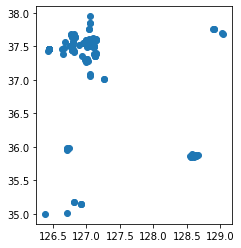

In [66]:
Xf=gdf_patientroutef
Xf.plot()

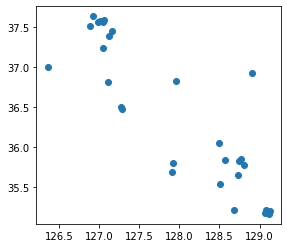

In [67]:
yf= gdf_casef
yf.plot()

In [0]:
def get_nearest_values(row, other_gdf, point_column='geometry', value_column="geometry"):
    """Find the nearest point and return the corresponding value from specified value column."""

    # Create an union of the other GeoDataFrame's geometries:
    other_points = other_gdf["geometry"].unary_union

    # Find the nearest points (uses euclidean geometry)
    nearest_geoms = nearest_points(row[point_column], other_points)

    # Get corresponding values from the other df
    nearest_data = other_gdf.loc[other_gdf["geometry"] == nearest_geoms[1]]

    nearest_location = nearest_data[value_column].to_numpy()[0]

    return nearest_location

In [69]:
unary_union = yf.unary_union
print(unary_union)

MULTIPOINT (126.354443 37.00035399999999, 126.884387 37.508163, 126.9165 37.63369, 126.984377 37.562405, 127.006 37.57680999999999, 127.0403 37.55713, 127.0517 37.2376, 127.056766 37.592888, 127.1139 36.81503, 127.1218 37.38833, 127.161627 37.455687, 127.265172 36.504713, 127.289 36.48025, 127.9127 35.68556, 127.917805 35.805681, 127.9552 36.82422, 128.4941 36.0581, 128.5008 35.54127, 128.5667 35.84008, 128.6866 35.22115, 128.7368 35.64887, 128.7373 35.82558, 128.7621 35.84819, 128.801498 35.782149, 128.9099 36.92757, 129.0633 35.17371, 129.0771 35.21628, 129.1124 35.16708, 129.1256 35.20599)


In [0]:
Xf["nearest_epicenter"] = Xf.apply(get_nearest_values, other_gdf=yf, point_column='geometry', value_column='geometry', axis=1)

In [0]:
Xf["nearest_epicenter_id"] = Xf.apply(get_nearest_values, other_gdf=yf, point_column='geometry', value_column='case_id', axis=1)

In [72]:
Xf

,patient_id,global_num,date,province,city,latitude,longitude,geometry,nearest_epicenter,nearest_epicenter_id
0,1400000001,1,2020-01-19,Incheon,Jung-gu,37.460459,126.440680,POINT (126.44068 37.46046),POINT (126.884387 37.508163),1000001
1,1400000001,1,2020-01-20,Incheon,Seo-gu,37.478832,126.668558,POINT (126.66856 37.47883),POINT (126.884387 37.508163),1000001
2,1000000001,2,2020-01-22,Gyeonggi-do,Gimpo-si,37.562143,126.801884,POINT (126.80188 37.56214),POINT (126.884387 37.508163),1000001
3,1000000001,2,2020-01-23,Seoul,Jung-gu,37.567454,127.005627,POINT (127.00563 37.56745),POINT (127.006 37.57680999999999),1000005
4,2000000001,3,2020-01-20,Incheon,Jung-gu,37.460459,126.440680,POINT (126.44068 37.46046),POINT (126.884387 37.508163),1000001
...,...,...,...,...,...,...,...,...,...,...
170,1200000031,31,2020-02-09,Daegu,Nam-gu,35.839820,128.566600,POINT (128.56660 35.83982),POINT (128.5667 35.84008),1200001
171,1200000031,31,2020-02-15,Daegu,Dong-gu,35.882410,128.662100,POINT (128.66210 35.88241),POINT (128.7373 35.82558),6000008
172,1200000031,31,2020-02-16,Daegu,Nam-gu,35.839820,128.566600,POINT (128.56660 35.83982),POINT (128.5667 35.84008),1200001
173,1200000031,31,2020-02-17,Daegu,Suseong-gu,35.844730,128.612300,POINT (128.61230 35.84473),POINT (128.5667 35.84008),1200001


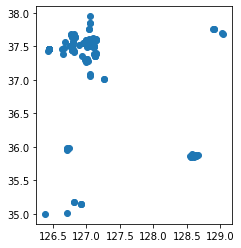

In [89]:
Xf.plot()


Now that I have Route geometry and the epicenter geometry all in one  geodataframe lets test the function

In [74]:
d = {'latitude': [37], 'longitude': [126]}
dftest = pd.DataFrame(data=d)
dftest

,latitude,longitude
0,37,126


In [75]:
def create_gdf_test(dftest, lng, lat):
    "Convert pandas dataframe into a Geopandas GeoDataFrame"
    crs = {'init': 'EPSG:3395'}
    xlng= pd.to_numeric(dftest['longitude'], errors='coerce')
    ylat= pd.to_numeric(dftest['latitude'], errors='coerce')
    geometry = [Point(xy) for xy in zip(xlng, ylat)]
    gdftest = gpd.GeoDataFrame(dftest, crs= crs , geometry=geometry)
    return gdftest
gdftestf =  create_gdf_test(dftest, "longitude", "latitude")
gdftestf.tail()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,latitude,longitude,geometry
0,37,126,POINT (126.00000 37.00000)


In [0]:
Xtest=gdftestf

In [77]:
Xtest.apply(get_nearest_values, other_gdf=yf, point_column='geometry', value_column='geometry', axis=1)


0    POINT (126.354443 37.00035399999999)
dtype: object

In [78]:
Xtest.apply(get_nearest_values, other_gdf=yf, point_column='geometry', value_column='case_id', axis=1)

0    4100002
dtype: int64

In [79]:
testresult=df_casef[df_casef.case_id == 4100002]
testresult

,case_id,province,city,group,infection_case,confirmed,latitude,longitude,geometry
54,4100002,Chungcheongnam-do,Seosan-si,True,Seosan-si Laboratory,8,37.000354,126.354443,POINT (126.35444 37.00035)


In [0]:
pd_seoul=pd.read_csv('SeoulFloating.csv')
pd_seoul.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


https://automating-gis-processes.github.io/site/develop/notebooks/L3/nearest-neighbour.html

was helpful for nearest neighbor analysis